```
This file is part of connectome-manipulator.

SPDX-License-Identifier: Apache-2.0
Copyright (c) 2024 Blue Brain Project/EPFL
```

# Model fitting example with cross-validation

Minimal working example to demonstrate the framework's model fitting capabilities with cross-validation (CV). Cross-validation is available for the model fitting code modules `conn_prob`, `conn_props`, and `delay`. It can be activated by adding the number of CV folds in the model building config file (e.g., `"CV_folds": 5`) or as an additional command line argument (e.g., `--cv-folds=5`).

In this example, we will fit a 2nd-order connectivity model with exponential distance-dependent connection probabilities to the connections between excitatory neurons in a small toy circuit.

<u>Notes on cross-validation</u>:
Model fitting is done on separate data splits as specified by the number of CV folds. A choice of N folds means that the whole input data (i.e., selection of source/target neurons) is divided into N random, non-overlapping data splits of approximately equal size (independent for source/target neurons). Model fitting is then performed by:

1. Extracting N-1 splits as training data set and the remaining split as testing data set, repeated N times so that each split is used as testing data set once
2. Fitting N independent models based on each of the N training data sets
3. Visualizing the N fitted models versus their respective training data sets (from which a trianing error can be derived), as well as versus each of the testing data sets which have not been used for the respective model fit (from which a testing error can be derived)

## Step 1: Download example circuit

Download and uncompress the SONATA toy circuit from ZENODO (DOI [10.5281/zenodo.12202780](https://doi.org/10.5281/zenodo.12202780)), or use any other network model in SONATA format.

## Step 2: Run model fitting

### Set up model building config

Under "circuit_config" in `model_config__ConnProb2ndOrder.json`, set the path pointing to the circuit config of the SONATA network model. Also, adjust "working_dir" and "out_dir" as needed. Note that the number of CV folds can be adjusted under "CV_folds". A value of 5 has been preset for this example.

### Launch model fitting

Launch model fitting using one of the following launch commands:

❗ Note that `--cv-folds=N` can be added to overwrite the respective value from config file

❗ Also note that all extracted training/testing data sets and fitted models are also contained in this repo under `/model_building/data` and `/model_building/model` respectively

__Launch directly:__

`connectome-manipulator build-model model_config__ConnProb2ndOrder.json --force-reextract --force-rebuild`

__Launch within SLURM allocation:__

`sbatch run_model_building.sh model_config__ConnProb2ndOrder.json --force-reextract --force-rebuild`

__Log output (example):__

~~~
[INFO] (Sep.03 10:39:47) Log file "/gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/model_fitting_with_CV/model_building/output/ConnProb2ndOrder/model_building_2024-09-03_10h39.log" created!
[INFO] (Sep.03 10:39:47) Version: connectome_manipulator 1.0.2
[INFO] (Sep.03 10:39:47) Circuit loaded: /gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/Zenodo/ToyCircuit-S1-6k/circuit_config.json
[INFO] (Sep.03 10:39:47) >>> CV 1/5 ("train") <<<
[INFO] (Sep.03 10:39:47) Running order-2 data extraction (sel_src={'synapse_class': 'EXC'}, sel_dest={'synapse_class': 'EXC'}, sample_size=None neurons, CV_dict={'n_folds': 5, 'fold_idx': 0, 'training_set': True})...
[DEBUG] (Sep.03 10:39:47) No position mapping provided
[DEBUG] (Sep.03 10:39:54) Extracting 1-dimensional (40) connection probabilities...
[INFO] (Sep.03 10:39:58) <TIME ELAPSED (data extraction): 11.3s>
[INFO] (Sep.03 10:39:58) Writing data to /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/model_fitting_with_CV/model_building/data/ConnProb2ndOrder__CV5-1-train.pickle
[INFO] (Sep.03 10:39:58) Running order-2 model building...
[DEBUG] (Sep.03 10:39:58) Rel. error of simple 2nd-order model fit: [0.01559894 0.02174278]
[DEBUG] (Sep.03 10:39:58) Model description:
ConnProb2ndOrderExpModel
  p_conn(d) = 0.126 * exp(-0.008 * d)
  d...distance
[INFO] (Sep.03 10:39:58) Model prediction of total number of connections: 60316 (model) vs. 69751 (data); DIFF -9435 (-13.53%)
[INFO] (Sep.03 10:39:58) <TIME ELAPSED (model building): 0.0s>
[INFO] (Sep.03 10:39:58) Writing model to /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/model_fitting_with_CV/model_building/model/ConnProb2ndOrder__CV5-1-train.json
[INFO] (Sep.03 10:39:58) Running order-2 data/model visualization...
[INFO] (Sep.03 10:39:59) Saving /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/model_fitting_with_CV/model_building/output/ConnProb2ndOrder/CV5-1-train/data_vs_model.png...
[INFO] (Sep.03 10:40:00) Saving /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/model_fitting_with_CV/model_building/output/ConnProb2ndOrder/CV5-1-train/data_counts.png...
...
[INFO] (Sep.03 10:41:04) >>> CV 5/5 ("test") <<<
[INFO] (Sep.03 10:41:04) Running order-2 data extraction (sel_src={'synapse_class': 'EXC'}, sel_dest={'synapse_class': 'EXC'}, sample_size=None neurons, CV_dict={'n_folds': 5, 'fold_idx': 4, 'training_set': False})...
[DEBUG] (Sep.03 10:41:04) No position mapping provided
[DEBUG] (Sep.03 10:41:06) Extracting 1-dimensional (40) connection probabilities...
[INFO] (Sep.03 10:41:06) <TIME ELAPSED (data extraction): 1.7s>
[INFO] (Sep.03 10:41:06) Writing data to /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/model_fitting_with_CV/model_building/data/ConnProb2ndOrder__CV5-5-test.pickle
[INFO] (Sep.03 10:41:06) Loading model from /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/model_fitting_with_CV/model_building/model/ConnProb2ndOrder__CV5-5-train.json
[INFO] (Sep.03 10:41:06) Running order-2 data/model visualization...
[INFO] (Sep.03 10:41:06) Saving /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/model_fitting_with_CV/model_building/output/ConnProb2ndOrder/CV5-5-test/data_vs_model.png...
[INFO] (Sep.03 10:41:07) Saving /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/model_fitting_with_CV/model_building/output/ConnProb2ndOrder/CV5-5-test/data_counts.png...
~~~

## Step 3: Analyze results

### Variability in model fits

We can first investigate how different the individual N models are which have been fit against different (but overlapping) portions of the data, e.g. by looking at the mean and variance of the model coefficients.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from connectome_manipulator.model_building import model_types

In [6]:
# Load models
N = 5  # CV folds
model_files = [f"./model_building/model/ConnProb2ndOrder__CV{N}-{_i + 1}-train.json" for _i in range(N)]
models = [model_types.AbstractModel.model_from_file(_f) for _f in model_files]

for _m in models:
    print(_m)

ConnProb2ndOrderExpModel
  p_conn(d) = 0.126 * exp(-0.008 * d)
  d...distance
ConnProb2ndOrderExpModel
  p_conn(d) = 0.127 * exp(-0.008 * d)
  d...distance
ConnProb2ndOrderExpModel
  p_conn(d) = 0.124 * exp(-0.008 * d)
  d...distance
ConnProb2ndOrderExpModel
  p_conn(d) = 0.128 * exp(-0.008 * d)
  d...distance
ConnProb2ndOrderExpModel
  p_conn(d) = 0.126 * exp(-0.008 * d)
  d...distance


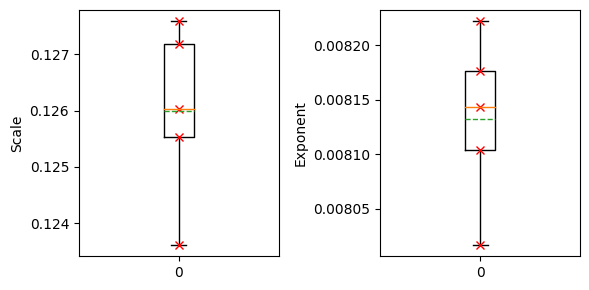

In [36]:
# Compare model coefficients
coeff_scale = np.array([_m.scale for _m in models])
coeff_exp = np.array([_m.exponent for _m in models])

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.boxplot(coeff_scale, positions=[0], showmeans=True, meanline=True, labels=None)
plt.plot(np.zeros_like(coeff_scale), coeff_scale, "xr")
plt.ylabel("Scale")
plt.subplot(1, 2, 2)
plt.boxplot(coeff_exp, positions=[0], showmeans=True, meanline=True, labels=None)
plt.plot(np.zeros_like(coeff_exp), coeff_exp, "xr")
plt.ylabel("Exponent")
plt.tight_layout()
plt.show()

We can see that all N values are within a small interval for both scale and exponent coefficients. We will therefore also visualize the resulting connection probability functions, showing that they are very close to each other.

We can also construct an average model by using the means of the coefficients.

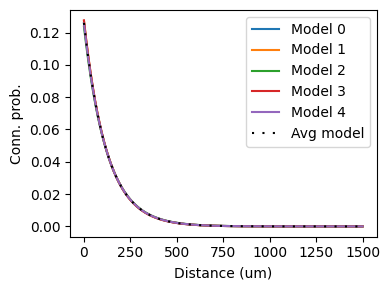

In [103]:
# Compare connection probability functions
avg_model = model_types.ConnProb2ndOrderExpModel(scale=np.mean(coeff_scale), exponent=np.mean(coeff_exp))

dist = np.arange(1501)  # Distance in um
plt.figure(figsize=(4, 3))
for _i, _m in enumerate(models):
    plt.plot(dist, _m.get_conn_prob(dist), label=f"Model {_i}")
plt.plot(dist, avg_model.get_conn_prob(dist), "k", ls=(0, (1, 4)), label=f"Avg model")
plt.xlabel("Distance (um)")
plt.ylabel("Conn. prob.")
plt.legend()
plt.tight_layout()
plt.show()

### Models vs. (unseen) test data

Finally, we can compare the models fits (on training data) to unseen test data, showing a very good correspondance as well.

In [70]:
import pickle

In [92]:
# Load test data
data_files = [f"./model_building/data/ConnProb2ndOrder__CV{N}-{_i + 1}-test.pickle" for _i in range(N)]
data = []
for _fn in data_files:
    with open(_fn, "rb") as f:
        data.append(pickle.load(f))

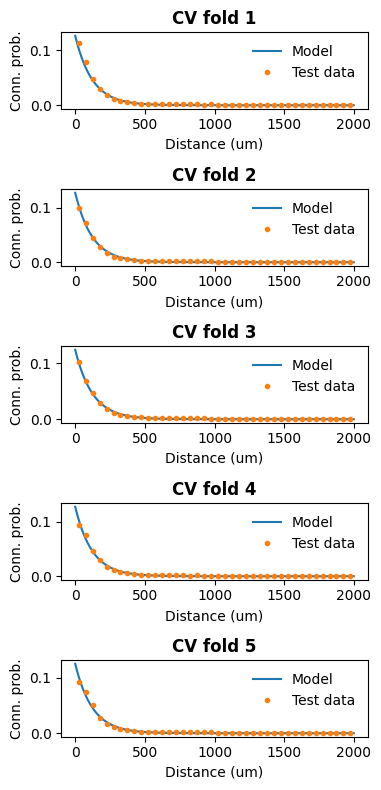

In [101]:
# Plot models vs. (unseen) test data
plt.figure(figsize=(4, 8))
for _i in range(N):
    d = data[_i]
    data_dist = d["dist_bins"][:-1] + 0.5 * np.diff(d["dist_bins"][:2])  # Bin centers
    data_p = d["p_conn_dist"]
    m = models[_i]
    model_dist = np.arange(np.max(d["dist_bins"]))
    model_p = m.get_conn_prob(model_dist)

    plt.subplot(N, 1, _i + 1)
    plt.plot(model_dist, model_p, label="Model")
    plt.plot(data_dist, data_p, ".", label="Test data")
    plt.xlabel("Distance (um)")
    plt.ylabel("Conn. prob.")
    plt.title(f"CV fold {_i + 1}", fontweight="bold")
    plt.legend(frameon=False)
plt.tight_layout()
plt.show()